In [ ]:
import concurrent.futures as cf
from scipy.optimize import curve_fit
from functions import sigmoid, variables, variables2, lin_reg, function_A, function_B
import matplotlib.pyplot as plt
%matplotlib inline

# Multithreading and Multiprocessing
As you saw during the lecture, using Multithreading and Multiprocessing is how we can parallelize our codes. Today we will work with
```concurrent.futures```, which is a Python module that allows us to work asynchronously with either separate processes or threads.

## Function A

The function A will calculate the Wallis product for $\pi$: 

$$\frac{\pi}{2} = \prod_{n=1}^{\infty} (\frac{2n}{2n-1}\cdot \frac{2n}{2n+1}) $$

In [ ]:
# Data to pass through the function A
nums = [1822725,
        22059421,
        32374695,
        88754320,
        9716266]

# We can leave the default value for workers:
workers = None

1. To Do: use Multithreading and Multiprocessing from ```concurrent.futures``` . Compare the results for `function_a()` using the magic command ```%%time```.

In [ ]:
# Multithreading
#TODO
# Hint 1: It shouldn't be longer than three lines of code including %%time.
# Hint 2: Use the call "map(func, *iterables)"

In [ ]:
# Multiprocessing
#TODO
# Hint 1: It shouldn't be longer than three lines of code including %%time.
# Hint 2: Use the call "map(func, *iterables)"

2. To Do: Which execution was faster? Why?

  Answer: 

## Function B

In [ ]:
# Data to pass through the function B

urls = ['http://www.google.com/',
        'http://www.facebook.com/',
        'http://www.yahoo.com/',
        'https://www.amazon.com',
        'https://www.ebay.com',
        'https://www.stackoverflow.com',
        'https://www.cnn.com',
        'http://www.bbc.co.uk',
        'https://www.twitch.tv', 
        'https://www.rottentomatoes.com/',
        'https://www.imdb.com/',
        'https://www.netflix.com/',
        'https://www.instagram.com/',
        'https://www.uber.com/']

workers = None

3. To Do:  use Multithreading and Multiprocessing from ```concurrent.futures``` and compare the results for `function_b()` using the magic command ```%%time```.

In [ ]:
# TODO 
# Multithreading

In [ ]:
# TODO 
# Multiprocessing

4. To Do: Which exectution was faster? Why?

  Answer:

## Using Multiprocessing and Multithreading with curve_fit

In [ ]:
x,y,yn = variables() # creating the variables using the function "variables()" from "functions.py"

Wall time: 2.57 s


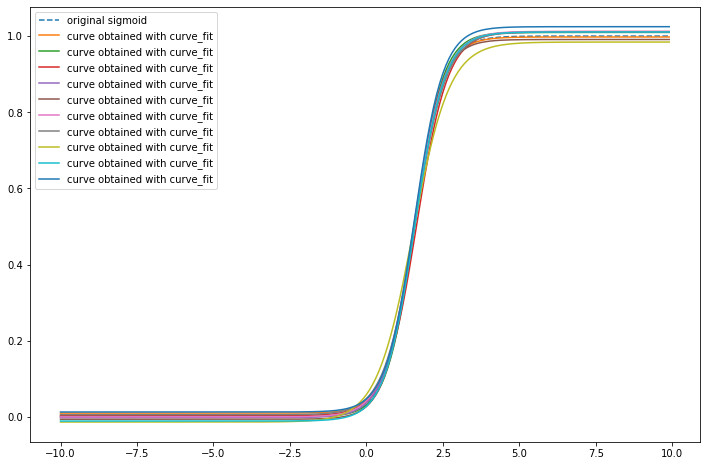

In [ ]:
%%time
plt.rcParams['figure.figsize'] = [12, 8]
plt.plot(x, y, '--', label = 'original sigmoid')

with cf.ProcessPoolExecutor(max_workers=workers) as e:
    future_to_url = {e.submit(curve_fit, *[sigmoid,  x, yi]): yi for yi in yn}
    for future in cf.as_completed(future_to_url):
        yi = future_to_url[future]
        try:
            data = future.result()[0]  # Why [0]? This way we save only popt on 'values'
        except Exception as exc:
            print('Exception generated: %s' % (exc))
        else:
            y_fit = sigmoid(x, *data)
            plt.plot(x, y_fit, label = 'curve obtained with curve_fit')
plt.legend()

5. To Do: Repeat the process for Multithreading

In [ ]:
# TODO

6. To Do: Which one was faster and why? 

  Answer:

## Using Multiprocessing and Multithreading with LinearRegression

In [ ]:
x2,y2,yn2 = variables2() # creating the variables using the function "variables2()" from "functions.py"

7. To Do: Use Multithreading and Multiprocessing for `lin_reg()` and plot the results (see ``curve_fit`` example).

  Hint: Check the exercise 4.

In [ ]:
#TODO
#Hint: It is very similar to he process with curve_fit()

In [ ]:
#TODO
#Hint: It is very similar to he process with curve_fit()

## Working in Google Colab 


In some cases, Multithreading is faster than Multiprocessing, even for heavy CPU tasks. 

8. To Do: Why is this happening while working (usually) in Google Colab?